In [83]:
import numpy as np

In [9]:
a = np.load('./untargetd_DPATCH.npy')

In [10]:
a = np.moveaxis(a, 0,-1)

In [11]:
a.shape

(416, 416, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


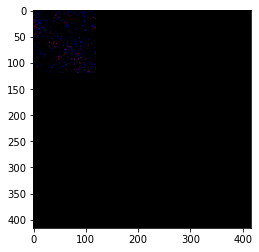

In [12]:
import matplotlib.pyplot as plt

plt.imshow(a)

In [84]:
import cv2

(160, 320, 3)


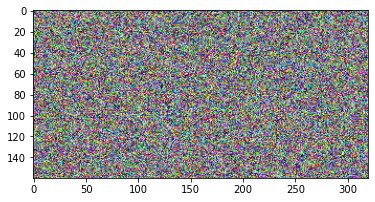

In [20]:
fake = np.random.randint(0, high=256, size=(160,320,3))
print(fake.shape)
plt.imshow(fake)

In [21]:
mask = np.ones_like(fake)

In [34]:
mask[60:110, 100:200] = 0

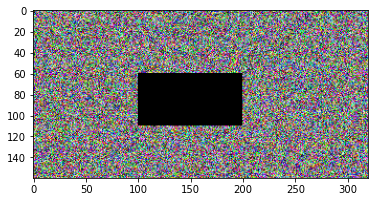

In [35]:
plt.imshow(mask*fake)

In [71]:
img = cv2.imread('best_patch.png')[60:420, 145:510]

In [72]:
img = cv2.resize(img, (100,50))

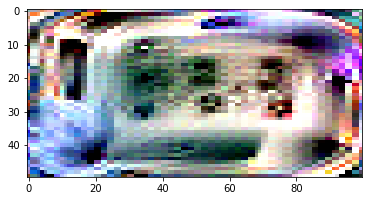

In [73]:
plt.imshow(img)

In [74]:
img= cv2.copyMakeBorder(img,60,50,100,120,cv2.BORDER_CONSTANT,value=(0,0,0))

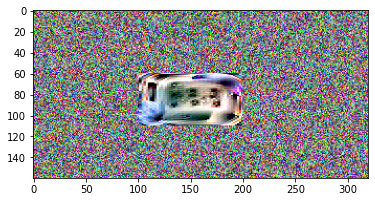

In [75]:
plt.imshow(mask*fake+img)

In [85]:
def add_noise(image):
    mask = np.ones_like(image)
    mask[60:110, 100:200] = 0
    patch = cv2.imread('best_patch.png')[60:420, 145:510]
    patch = cv2.resize(patch, (100,50))
    patch= cv2.copyMakeBorder(patch,60,50,100,120,cv2.BORDER_CONSTANT,value=(0,0,0))
    return mask*image+patch
    plt.imshow(mask*fake+img)

In [86]:
x = cv2.imread('Desktop/Simulation/IMG/center_2020_10_31_18_33_26_418.jpg')

In [87]:
add_noise(x)

IndexError: too many indices for array

In [100]:
from math import sqrt
 
def rk4(f, x0, y0, x1, n):
    vx = [0] * (n + 1)
    vy = [0] * (n + 1)
    h = (x1 - x0) / float(n)
    vx[0] = x = x0
    vy[0] = y = y0
    for i in range(1, n + 1):
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5 * h, y + 0.5 * k1)
        k3 = h * f(x + 0.5 * h, y + 0.5 * k2)
        k4 = h * f(x + h, y + k3)
        vx[i] = x = x0 + i * h
        vy[i] = y = y + (k1 + k2 + k2 + k3 + k3 + k4) / 6
    return vx, vy
 
def f(x, y):
    return -265/1100*y
 
vx, vy = rk4(f, 0, 20, 3, 30)
for x, y in list(zip(vx, vy))[::10]:
     print("%4.1f %10.5f %+12.4e" % (x, y, y - (4 + x * x)**2 / 16))

 0.0   20.00000  +1.9000e+01
 1.0   15.71826  +1.4156e+01
 2.0   12.35319  +8.3532e+00
 3.0    9.70853  -8.5397e-01


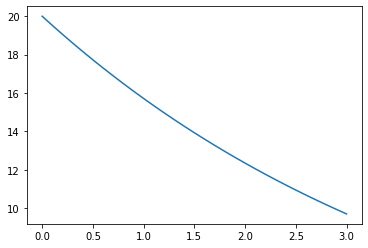

In [92]:
import matplotlib.pyplot as plt
plt.plot(vx,vy)

 0.000 20.000
 0.100 19.518
 0.200 19.048
 0.300 18.589
 0.400 18.141
 0.500 17.704
 0.600 17.278
 0.700 16.861
 0.800 16.455
 0.900 16.059
 1.000 15.672
 1.100 15.294
 1.200 14.926
 1.300 14.566
 1.400 14.215
 1.500 13.873
 1.600 13.539
 1.700 13.213
 1.800 12.894
 1.900 12.584
 2.000 12.281
 2.100 11.985
 2.200 11.696
 2.300 11.414
 2.400 11.139
 2.500 10.871
 2.600 10.609
 2.700 10.353
 2.800 10.104
 2.900  9.861


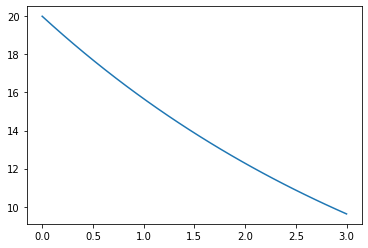

In [99]:
def euler(f,y0,a,b,h):
	t,y = a,y0
	while t <= b:
		print("%6.3f %6.3f" % (t,y))
		t += h
		y += h * f(t,y)
 
def func(t, v):
	return -265/1100*v
 
euler(func,20,0,3,0.1)

plt.plot(t,y)